In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.regression as sr

In [3]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [6]:
df = pd.get_dummies(df).astype(float)
df.head()

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,35000.0,34000.0,3.0,0.0,1.0,0.0
2,57000.0,26100.0,5.0,0.0,1.0,0.0
3,22500.0,40000.0,2.0,0.0,1.0,0.0
4,46000.0,31500.0,4.0,0.0,1.0,0.0


In [7]:
real_x = df.drop(['Sell Price($)','Car Model_Mercedez Benz C class'],axis=1).values
real_x

array([[6.90e+04, 6.00e+00, 0.00e+00, 1.00e+00],
       [3.50e+04, 3.00e+00, 0.00e+00, 1.00e+00],
       [5.70e+04, 5.00e+00, 0.00e+00, 1.00e+00],
       [2.25e+04, 2.00e+00, 0.00e+00, 1.00e+00],
       [4.60e+04, 4.00e+00, 0.00e+00, 1.00e+00],
       [5.90e+04, 5.00e+00, 1.00e+00, 0.00e+00],
       [5.20e+04, 5.00e+00, 1.00e+00, 0.00e+00],
       [7.20e+04, 6.00e+00, 1.00e+00, 0.00e+00],
       [9.10e+04, 8.00e+00, 1.00e+00, 0.00e+00],
       [6.70e+04, 6.00e+00, 0.00e+00, 0.00e+00],
       [8.30e+04, 7.00e+00, 0.00e+00, 0.00e+00],
       [7.90e+04, 7.00e+00, 0.00e+00, 0.00e+00],
       [5.90e+04, 5.00e+00, 0.00e+00, 0.00e+00]])

In [9]:
real_y = df.iloc[:,1].values.astype(float)
real_y

array([18000., 34000., 26100., 40000., 31500., 29400., 32000., 19300.,
       12000., 22000., 20000., 21000., 33000.])

In [12]:
real_x = np.append(arr=real_x,values=np.ones((13,1)).astype(float),axis=1)
real_x

array([[6.90e+04, 6.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [3.50e+04, 3.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [5.70e+04, 5.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [2.25e+04, 2.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [4.60e+04, 4.00e+00, 0.00e+00, 1.00e+00, 1.00e+00],
       [5.90e+04, 5.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [5.20e+04, 5.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [7.20e+04, 6.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [9.10e+04, 8.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [6.70e+04, 6.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [8.30e+04, 7.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [7.90e+04, 7.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [5.90e+04, 5.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]])

In [23]:
x_opt = real_x[:,[0,1,2,3,4]]

In [24]:
lin_reg = sm.OLS(endog=real_y,exog=x_opt).fit()

In [25]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     32.31
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           5.50e-05
Time:                        14:58:12   Log-Likelihood:                -116.29
No. Observations:                  13   AIC:                             242.6
Df Residuals:                       8   BIC:                             245.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3701      0.314     -1.178      0.272      -1.094       0.354
x2         -1332.4536   3675.701     -0.363      0.726   -9808.636    7143.729
x3         -2453.5407   1689.879     -1.452      0.185   -6350.410    1443.328
x4         -6738.2073   2008.330     -3.355      0.010   -1.14e+04   -2106.991
const       5.898e+04   3616.763     16.306      0.000    5.06e+04    6.73e+04
==============================================================================
Omnibus:                        2.216   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.310
Skew:                          -0.764   Prob(JB):                        0.519
Kurtosis:                       2.713   Cond. No.                     4.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x_opt = real_x[:,[0,1,3,4]]
lin_reg = sm.OLS(endog=real_y,exog=x_opt).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     37.73
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           2.00e-05
Time:                        15:00:49   Log-Likelihood:                -117.81
No. Observations:                  13   AIC:                             243.6
Df Residuals:                       9   BIC:                             245.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3187      0.331     -0.964      0.360      -1.067       0.429
x2         -1863.3215   3876.079     -0.481      0.642   -1.06e+04    6904.979
x3         -5387.5904   1886.285     -2.856      0.019   -9654.664   -1120.517
const       5.739e+04   3653.691     15.707      0.000    4.91e+04    6.57e+04
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.332
Skew:                          -0.144   Prob(JB):                        0.847
Kurtosis:                       2.271   Cond. No.                     3.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
x_opt = real_x[:,[0,3,4]]
lin_reg = sm.OLS(endog=real_y,exog=x_opt).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     61.18
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           2.46e-06
Time:                        15:01:42   Log-Likelihood:                -117.98
No. Observations:                  13   AIC:                             242.0
Df Residuals:                      10   BIC:                             243.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4759      0.047    -10.056      0.000      -0.581      -0.370
x2         -5256.1259   1793.168     -2.931      0.015   -9251.554   -1260.698
const       5.702e+04   3432.177     16.614      0.000    4.94e+04    6.47e+04
==============================================================================
Omnibus:                        0.140   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.348
Skew:                           0.107   Prob(JB):                        0.840
Kurtosis:                       2.228   Cond. No.                     3.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
x_opt[1,:]

array([3.5e+04, 1.0e+00, 1.0e+00])

In [35]:
lin_reg.predict([[8.6e+04, 1.0e+00, 1.0e+00]])

array([10835.65106055])

In [46]:
row,col = real_x.shape
col

5

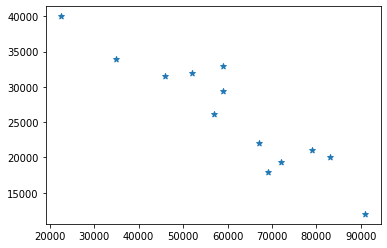

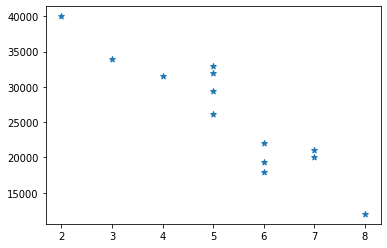

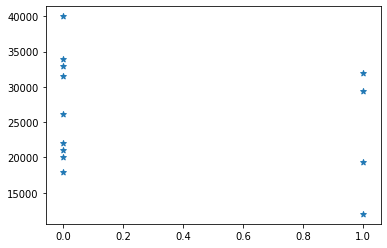

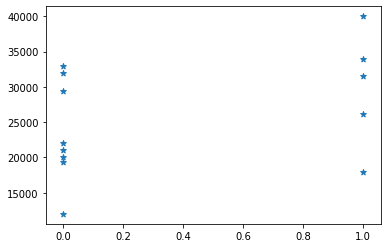

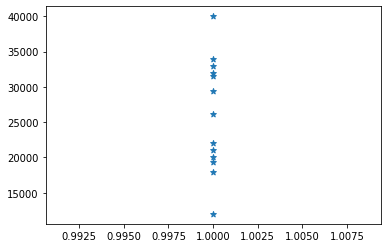

In [57]:
%matplotlib inline
for i in range(col):
    plt.scatter(real_x[:,i],real_y,marker='*')
    plt.show()
#plt.scatter(real_x[:,0],real_y)

In [ ]:
lin

In [ ]:
lin_reg.

In [ ]:
lin_reg.predict([[6.5e+04, 1.0e+00, 1.0e+00]])

In [20]:
lin_reg.predict([[6.10e+04, 6.00e+00, 0.00e+00, 1.00e+00,1.00e+00]])

array([21666.24912128])